# Project 3: Reddit's API WebScrapping for Predicting Comments and Modeling

KIROS Gebremariam, June 2,2018

Data Science Immersive, General Assembly(DC)

#### Setup and Loading file

In [1]:
## YOUR CODE HERE

In [2]:
# importing Necessary Library
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime
import json
import os
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus



#  Configure Visual setting 
sns.set_style('whitegrid')
plt.style.use(['bmh','presentation'])
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.style.use('ggplot')
np.random.seed(42)
sns.set()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline    

#### 1 Load the Data

#### Load in the the data of scraped results

In [3]:
## YOUR CODE HERE

In [4]:
# checking the easist way of looking the files you have in the directory
import os
print(os.listdir())

['.ipynb_checkpoints', 'Exploratory Analysis and Target selection Proj3- 2-.ipynb', 'NLP and Modeling  Proj3- 3-Final.ipynb', 'Pro3ExpFinal.csv', 'Pro3ExpFinal0602.csv', 'Project 3 _EDA_Part_One.ipynb', 'Project three Presentation.ppt', 'Project3edapartone.csv', 'README.md', 'Reddit06022018.csv', 'Requirements.txt']


In [5]:
# Lets load the Concatenated DataFrame and the engine specification will help to delimit the outliers
df = pd.read_csv('Project3edapartone.csv',index_col ='Unnamed: 0' , engine='python')

##### 2.1 Checking the DataFrame basic Format and columns

In [6]:
# print out the  size of the data and the number of rows and columns
print(df.head())
print(df.shape)
print(df.describe())

           author     created  created_utc       domain  \
1          Kxshal  1527786022   1527757222  twitter.com   
2       JMyers666  1527758232   1527729432    v.redd.it   
3  Endless_Vanity  1527712883   1527684083  i.imgur.com   
4    WitnessMeIRL  1527904422   1527875622    v.redd.it   
5       scbmobile  1527717426   1527688626  i.imgur.com   

                       fetched time  gilded      id       name  num_comments  \
1  2018-05-31 15:35:57.507532+00:00       0  8ngwe5  t3_8ngwe5            63   
2  2018-05-31 15:35:57.507532+00:00       0  8ndytk  t3_8ndytk          1288   
3  2018-05-31 10:27:31.504151+00:00       0  8n88yu  t3_8n88yu           170   
4  2018-06-01 20:49:52.948499+00:00       0  8ntyvl  t3_8ntyvl            69   
5  2018-05-30 19:56:34.671849+00:00       0  8n8rlc  t3_8n8rlc           167   

   score    ...      subreddit_id  subreddit_subscribers subreddit_type  \
1    347    ...          t5_2qn0o                  97252         public   
2  36191    ..

##### 2.2. Determining Missing observations

In [7]:
# Checking missing values `.isnull() will convert to the boolean True and False and return new DataFrame where null values
# are indicated by True and the .sum() will give us the total numbel of null values per column.
# checking the null values in the DF , according to Ben this is the fancy one
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)   # credit Ben shaver

thumbnail_width          0.098485
thumbnail_height         0.092424
url                      0.000303
ups                      0.000303
title                    0.000303
visited                  0.000303
which_sub                0.000000
name                     0.000000
created                  0.000000
created_utc              0.000000
domain                   0.000000
fetched time             0.000000
gilded                   0.000000
id                       0.000000
stickied                 0.000000
num_comments             0.000000
score                    0.000000
spoiler                  0.000000
subreddit                0.000000
subreddit_id             0.000000
subreddit_subscribers    0.000000
subreddit_type           0.000000
author                   0.000000
dtype: float64

#####  2.3. Describing the summary statistics of the columns

In [8]:
# the describe function gives summary statistics for each variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
created,3300.0,1.527772e+09,6.615321e+04,1.527438e+09,1.527738e+09,1.527765e+09,1.527800e+09,1.527949e+09
created_utc,3300.0,1.527743e+09,6.615321e+04,1.527409e+09,1.527710e+09,1.527737e+09,1.527771e+09,1.527920e+09
gilded,3300.0,3.060606e-02,3.402426e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01
num_comments,3300.0,1.417842e+02,4.204681e+02,0.000000e+00,1.300000e+01,3.800000e+01,1.150000e+02,9.444000e+03
score,3300.0,3.922831e+03,8.327985e+03,2.500000e+01,2.160000e+02,8.510000e+02,3.598000e+03,9.133900e+04
subreddit_subscribers,3300.0,1.978002e+06,4.960222e+06,2.204000e+03,5.588175e+04,1.882990e+05,5.445655e+05,1.963231e+07
thumbnail_height,2995.0,1.181890e+02,2.675423e+01,1.000000e+01,9.500000e+01,1.400000e+02,1.400000e+02,1.890000e+02
thumbnail_width,2975.0,1.397647e+02,4.052252e+00,7.000000e+01,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02
ups,3299.0,3.923950e+03,8.328999e+03,2.500000e+01,2.160000e+02,8.550000e+02,3.598000e+03,9.133900e+04


##### 2.4.  Feature Engineering/ Exploring the Target Variable

###### 2.4.1  Exploring by Title

In [9]:
#checking the number of unique titles in the data set
len(df['title'].unique())

3269

In [10]:
x = list(df['title'].head(3))   # calling the five titles as list from the Df
x

['Fekir told President Jean Michel #Aulas that he wants to join Liverpool!  #Liverpool wants to buy the French international before the World Cup',
 ' A diver in Belize has made friends with an octopus. She named him Egbert and brings him treats in his own jar',
 ' A plum tree in Japan.']

###### 2.4.2 : Exploring by Num of Comments

In [11]:
# number of unique  num_comments in the data set
len(df['num_comments'].unique())

543

In [12]:
# The Duplicates have diffrent time fetched the file
df.sort_values(by=['title','num_comments'],inplace =True)
df.head()

,author,created,created_utc,domain,fetched time,gilded,id,name,num_comments,score,...,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail_height,thumbnail_width,title,ups,url,visited,which_sub
2,JMyers666,1527758232,1527729432,v.redd.it,2018-05-31 15:35:57.507532+00:00,0,8ndytk,t3_8ndytk,1288,36191,...,t5_3gdh7,1124981,public,78.0,140.0,A diver in Belize has made friends with an oc...,36191.0,https://v.redd.it/hpebu4tce3111,False,others
3,Endless_Vanity,1527712883,1527684083,i.imgur.com,2018-05-31 10:27:31.504151+00:00,0,8n88yu,t3_8n88yu,170,31998,...,t5_2qh0u,18688609,public,140.0,140.0,A plum tree in Japan.,31998.0,https://i.imgur.com/AqKOm52.jpg,False,cat
4,WitnessMeIRL,1527904422,1527875622,v.redd.it,2018-06-01 20:49:52.948499+00:00,0,8ntyvl,t3_8ntyvl,69,1691,...,t5_3gdh7,1130590,public,74.0,140.0,A relaxing stroll along the river,1691.0,https://v.redd.it/g2w0ug0ygf111,False,others
58,I_am_Brooks_Orpik,1527711682,1527682882,self.caps,2018-06-01 00:14:03.297542+00:00,0,8n84d6,t3_8n84d6,47,504,...,t5_2rouz,16825,public,133.0,140.0,GRIT SCF G2 EDITION,504.0,https://www.reddit.com/r/caps/comments/8n84d6/...,False,others
3048,Fleece_It_Out_,1527782695,1527753895,imgur.com,2018-05-31 10:57:07.800747+00:00,0,8ngnlr,t3_8ngnlr,71,49,...,t5_2re84,92530,public,140.0,140.0,Just a little curious since no one's interest...,49.0,http://imgur.com/a/2CgPOUJ,False,others


In [13]:
print(df['num_comments'].median())      # median of number of comments
print(df['num_comments'].mean())        # mean of number of comments
df['num_comments'].describe()       # statistical description num-comments

38.0
141.78424242424242


count    3300.000000
mean      141.784242
std       420.468088
min         0.000000
25%        13.000000
50%        38.000000
75%       115.000000
max      9444.000000
Name: num_comments, dtype: float64

In [14]:
#  Now lets see the percentage of number of comments
# that have more than 3,000 comments by the subreddit users?
((df[df['num_comments']>3000]['num_comments'].count())/len(df))*100

0.33333333333333337

C:\Users\kiraz\AppData\Local\conda\conda\envs\dsi\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


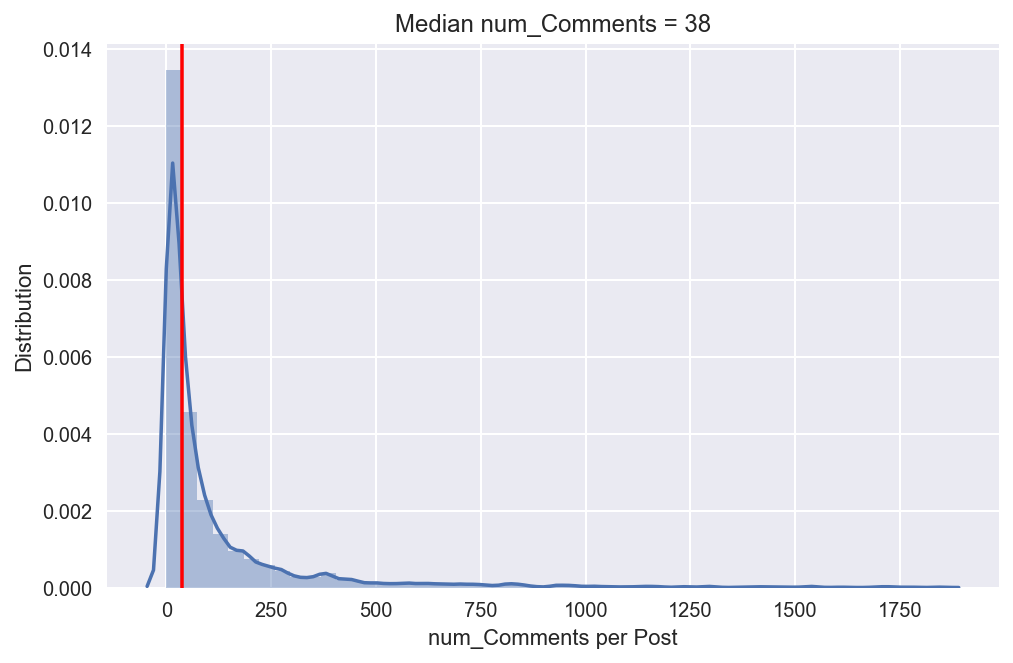

In [15]:
# Now lets see distribution of the posts with
# less than 2000  number of comments?
fig = plt.figure(figsize=(8,5))
ax=sns.distplot(df[df['num_comments']<2000]['num_comments']);
plt.axvline(x=df['num_comments'].median(), color='red');
ax.set(ylabel='Distribution', xlabel='num_Comments per Post', title='Median num_Comments = 38')
plt.show;

In [16]:
#  I am very curious to see the content of the top five posts 
# that have significant number of comments by subreddit users
df[df['num_comments']>=2000].sort_values(by='num_comments', ascending=False).head(5)

,author,created,created_utc,domain,fetched time,gilded,id,name,num_comments,score,...,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail_height,thumbnail_width,title,ups,url,visited,which_sub
2852,BreslinLotShots,1527807025,1527778225,self.AskReddit,2018-06-01 00:13:32.080560+00:00,0,8nj0ha,t3_8nj0ha,9444,7371,...,t5_2qh1i,19299199,public,NaN,NaN,"What band/artist is the king of ""all of our so...",7371.0,https://www.reddit.com/r/AskReddit/comments/8n...,False,AskReddit
2867,magnificentmicrobes,1527726101,1527697301,self.AskReddit,2018-05-31 10:28:30.882837+00:00,0,8n9x0i,t3_8n9x0i,7934,10438,...,t5_2qh1i,19292243,public,NaN,NaN,What the sluttiest thing you 've ever done?,10438.0,https://www.reddit.com/r/AskReddit/comments/8n...,False,AskReddit
2876,magnificentmicrobes,1527726101,1527697301,self.AskReddit,2018-06-01 20:49:51.465440+00:00,0,8n9x0i,t3_8n9x0i,7934,10438,...,t5_2qh1i,19292243,public,NaN,NaN,Whats the sluttiest thing youve ever done?,10438.0,https://www.reddit.com/r/AskReddit/comments/8n...,False,AskReddit
2945,Anthonym82,1527814601,1527785801,self.AskReddit,2018-05-31 23:55:12.672038+00:00,0,8nk1ec,t3_8nk1ec,5777,18334,...,t5_2qh1i,19299174,public,NaN,NaN,Which creepy urban legend turned out to be true?,18334.0,https://www.reddit.com/r/AskReddit/comments/8n...,False,AskReddit
2705,pipsdontsqueak,1527803290,1527774490,cnbc.com,2018-05-31 17:47:11.882815+00:00,0,8nijjr,t3_8nijjr,5435,29017,...,t5_2qh13,18781051,public,73.0,140.0,Trump administration will put steel and alumin...,29017.0,http://cnbc.com/id/105241999,False,cat


C:\Users\kiraz\AppData\Local\conda\conda\envs\dsi\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


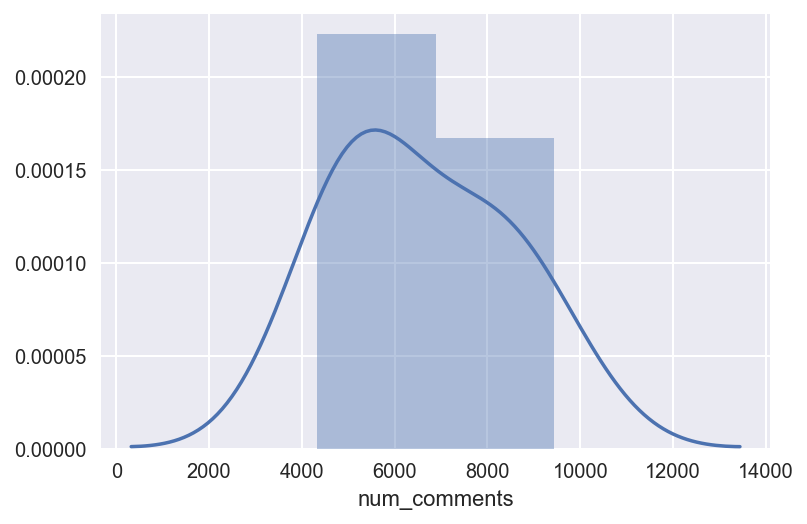

In [17]:
# Distribution of the posts with more than 4000 comments?
sns.distplot(df[df['num_comments']>=4000]['num_comments']);

In [18]:
#  I am very curious to see the content of the top five posts 
# that have significant number of comments by subreddit users
df[df['num_comments']>=5000].sort_values(by='num_comments', ascending=False).head(5)

,author,created,created_utc,domain,fetched time,gilded,id,name,num_comments,score,...,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail_height,thumbnail_width,title,ups,url,visited,which_sub
2852,BreslinLotShots,1527807025,1527778225,self.AskReddit,2018-06-01 00:13:32.080560+00:00,0,8nj0ha,t3_8nj0ha,9444,7371,...,t5_2qh1i,19299199,public,NaN,NaN,"What band/artist is the king of ""all of our so...",7371.0,https://www.reddit.com/r/AskReddit/comments/8n...,False,AskReddit
2867,magnificentmicrobes,1527726101,1527697301,self.AskReddit,2018-05-31 10:28:30.882837+00:00,0,8n9x0i,t3_8n9x0i,7934,10438,...,t5_2qh1i,19292243,public,NaN,NaN,What the sluttiest thing you 've ever done?,10438.0,https://www.reddit.com/r/AskReddit/comments/8n...,False,AskReddit
2876,magnificentmicrobes,1527726101,1527697301,self.AskReddit,2018-06-01 20:49:51.465440+00:00,0,8n9x0i,t3_8n9x0i,7934,10438,...,t5_2qh1i,19292243,public,NaN,NaN,Whats the sluttiest thing youve ever done?,10438.0,https://www.reddit.com/r/AskReddit/comments/8n...,False,AskReddit
2945,Anthonym82,1527814601,1527785801,self.AskReddit,2018-05-31 23:55:12.672038+00:00,0,8nk1ec,t3_8nk1ec,5777,18334,...,t5_2qh1i,19299174,public,NaN,NaN,Which creepy urban legend turned out to be true?,18334.0,https://www.reddit.com/r/AskReddit/comments/8n...,False,AskReddit
2705,pipsdontsqueak,1527803290,1527774490,cnbc.com,2018-05-31 17:47:11.882815+00:00,0,8nijjr,t3_8nijjr,5435,29017,...,t5_2qh13,18781051,public,73.0,140.0,Trump administration will put steel and alumin...,29017.0,http://cnbc.com/id/105241999,False,cat


In [19]:
#   still i am interested to see the post with more than 
# 4000 and above  subreddit  num of comments 
list(df.loc[df['num_comments']>=4000, 'title'])

['Trump administration will put steel and aluminum tariffs on Canada, Mexico and the EU',
 'What band/artist is the king of "all of our songs sound the same"?',
 'What is something that you dont appreciate you have until its gone?',
 "What the sluttiest thing you 've ever done?",
 "What's a good movie everyone should watch but almost no one has?",
 'Whats the sluttiest thing youve ever done?',
 'Which creepy urban legend turned out to be true?']

###### 2.4.3. Exploring By Subreddit

In [20]:
#  looking on to the unique subreddit from the scraped data
print('unique subreddit:', df['subreddit'].nunique())    #
print(' Percentage of subreddit unique to my scrapped Data ?', 100*df['subreddit'].nunique()/len(df))

unique subreddit: 1566
 Percentage of subreddit unique to my scrapped Data ? 47.45454545454545


In [21]:
#  Now lets dive in to see the most popular subreddits 
# so to get that lets group them by number of posts
#print('unique subreddits:', df['subreddit'].value_counts())
subs=df.groupby('subreddit')['subreddit'].value_counts().sort_values(ascending=False)
subs.head(10)

subreddit           subreddit         
funny               funny                 27
todayilearned       todayilearned         26
pics                pics                  25
aww                 aww                   23
mildlyinteresting   mildlyinteresting     19
gaming              gaming                18
BlackPeopleTwitter  BlackPeopleTwitter    16
gifs                gifs                  15
Kanye               Kanye                 13
PrequelMemes        PrequelMemes          13
Name: subreddit, dtype: int64

2.10727969348659


C:\Users\kiraz\AppData\Local\conda\conda\envs\dsi\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


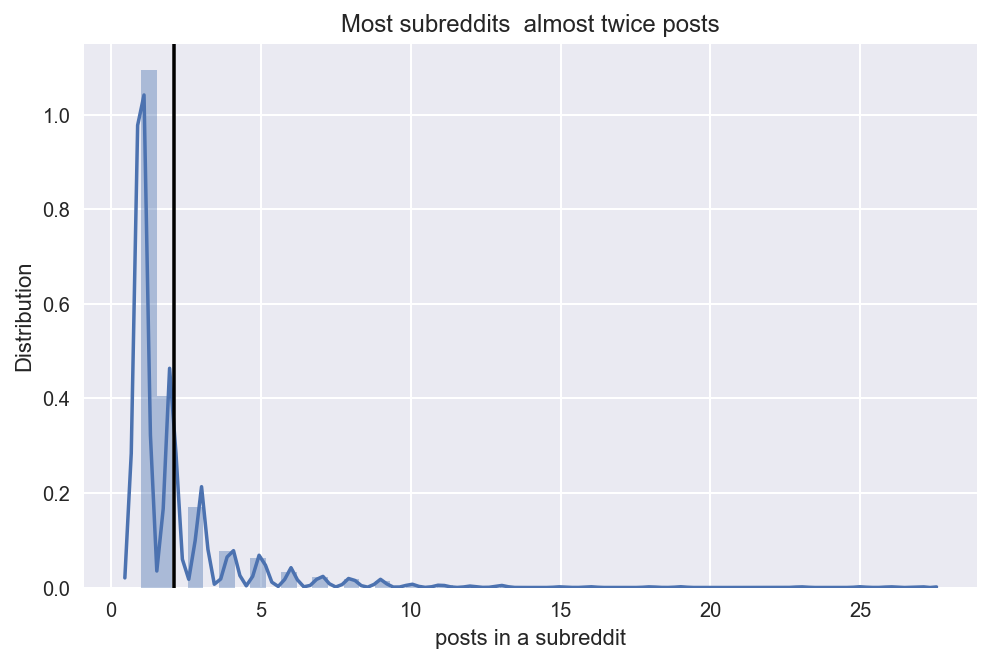

In [22]:
# Distribution of Subreddit posts and most have about twice posted
print(subs.mean())
fig = plt.figure(figsize=(8,5))
ax=sns.distplot(subs)
plt.axvline(x=subs.mean(), color='black');
ax.set(ylabel='Distribution', xlabel='posts in a subreddit', title='Most subreddits  almost twice posts');

In [23]:
df['subreddit'].unique()  # unique subreddits

array(['NatureIsFuckingLit', 'pics', 'caps', ..., 'unexpectedfactorial',
       'wowthissubexists', 'xkcd'], dtype=object)

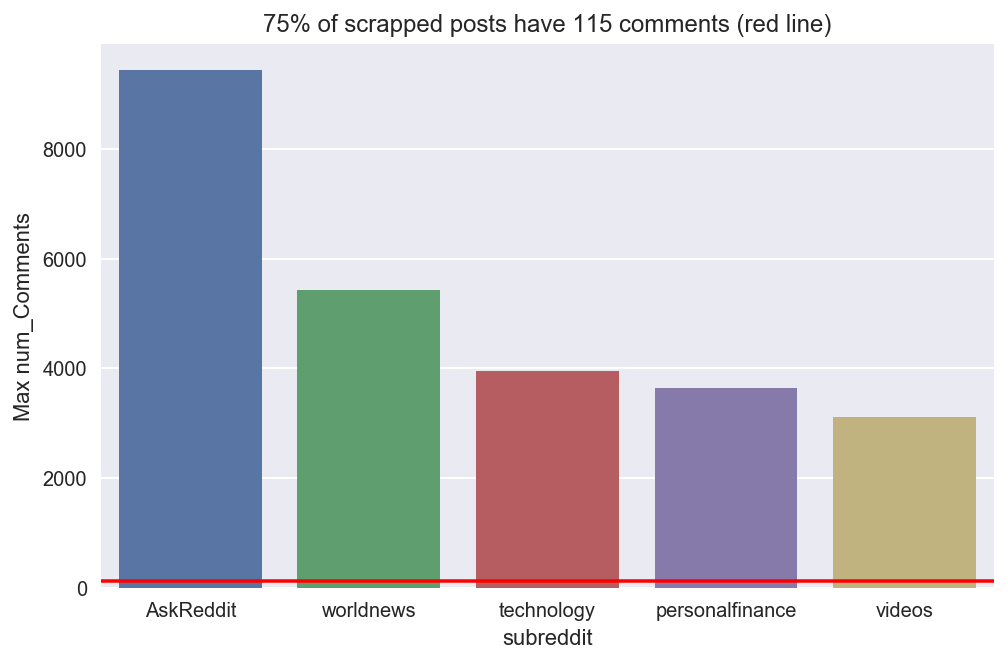

In [24]:
# checking the top five subreddits, by max number of comments
bars=pd.DataFrame(df.groupby('subreddit')['num_comments'].max().sort_values(ascending=False).head(5))
bars.reset_index(inplace=True)
fig = plt.figure(figsize=(8,5))
ax=sns.barplot(x=bars['subreddit'], y=bars['num_comments'])
ax.set(ylabel='Max num_Comments', xlabel='subreddit', title='75% of scrapped posts have 115 comments (red line)')
plt.axhline(y= 115, color='r');
plt.show;

In [25]:
#  Most popular subreddits 
print('The median of num_comments by subreddit', df.groupby('subreddit')['num_comments'].sum().describe())
df.groupby('subreddit')['num_comments'].sum().sort_values(ascending=False).head(10)

The median of num_comments by subreddit count     1566.000000
mean       298.779055
std       1563.340209
min          0.000000
25%         11.000000
50%         33.000000
75%        130.000000
max      47360.000000
Name: num_comments, dtype: float64


subreddit
AskReddit             47360
todayilearned         20371
pics                  12400
worldnews             11289
videos                10803
funny                  9540
news                   9410
BlackPeopleTwitter     7379
gaming                 7376
gifs                   7115
Name: num_comments, dtype: int64

In [26]:
#  The third quartile of the top num_ comments 
subs=df.groupby('subreddit')['num_comments'].sum()
x=subs.sum()
y=subs[subs>=130].sum()
print (x, y, y/x)

467888 432149 0.923616335533


#### Categorical Variable of most Subreddit popular post

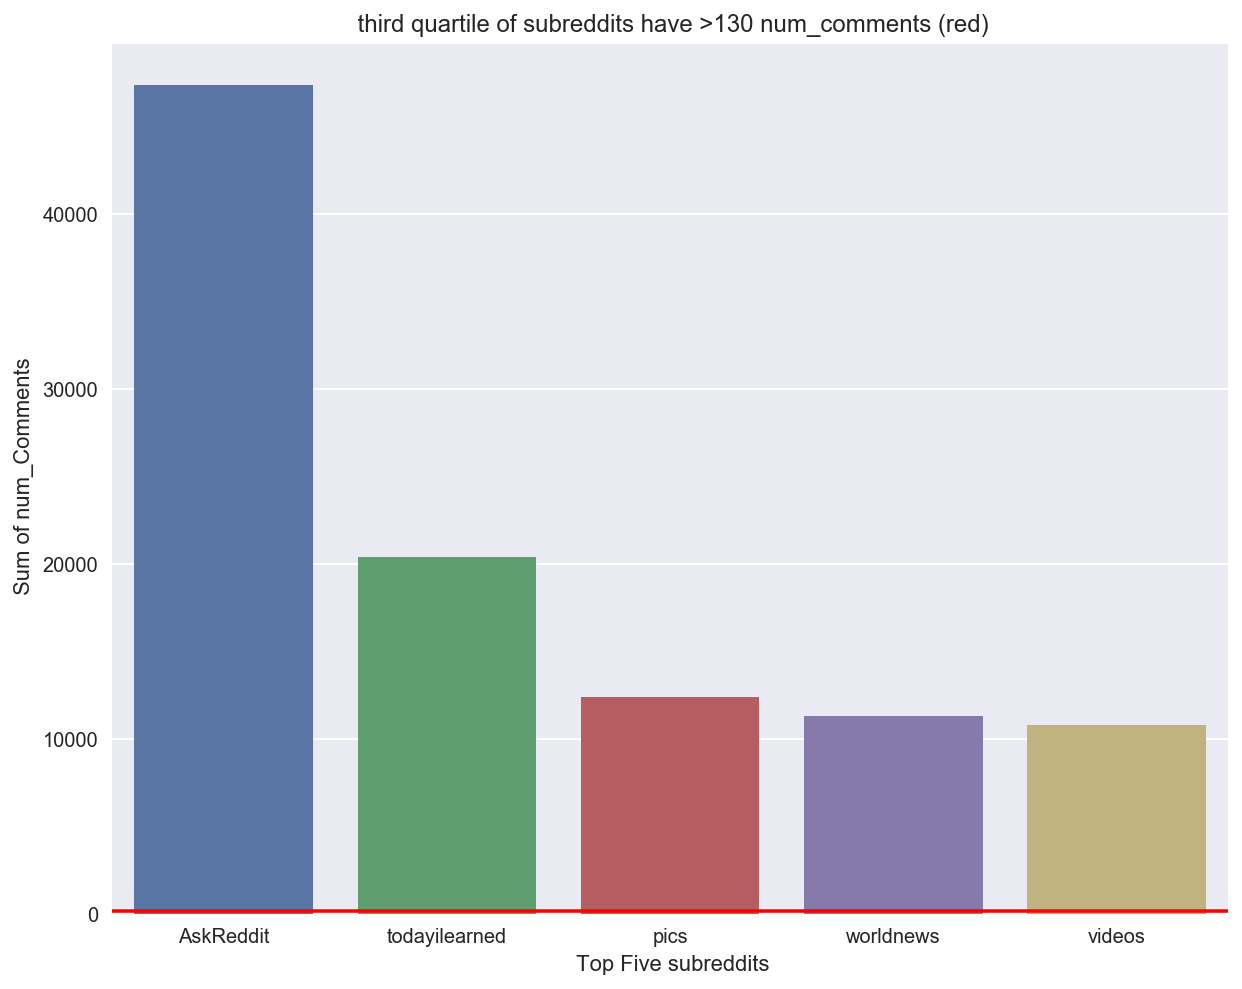

In [27]:
# Visual view of  top five subreddits
bars=pd.DataFrame(df.groupby('subreddit')['num_comments'].sum().sort_values(ascending=False).head(5))
bars.reset_index(inplace=True)
fig = plt.figure(figsize=(10,8))
ax=sns.barplot(x=bars['subreddit'], y=bars['num_comments'])
ax.set(ylabel=' Sum of num_Comments', xlabel=' Top Five subreddits', title=' third quartile of subreddits have >130 num_comments (red)')
plt.axhline(y=130, color='r');

In [28]:
med_comments = df['num_comments'].median() 
med_comments

38.0

In [29]:
# checking the percentage of posts with more than 100 num_comments
(df[df['num_comments']> 100]['num_comments'].count())/len(df)*100

27.575757575757574

In [30]:
# creating feature for length of title (characters)
df['title'] = df['title'].astype(str)
df['length'] = df['title'].apply(lambda x: len(x))
df['length'].describe()

count    3300.000000
mean       56.940303
std        57.372707
min         2.000000
25%        24.000000
50%        40.000000
75%        70.000000
max      1416.000000
Name: length, dtype: float64

In [31]:
np.corrcoef(df['num_comments'],df['length'])  # correlation of num of comments with title

array([[ 1.        ,  0.08033472],
       [ 0.08033472,  1.        ]])

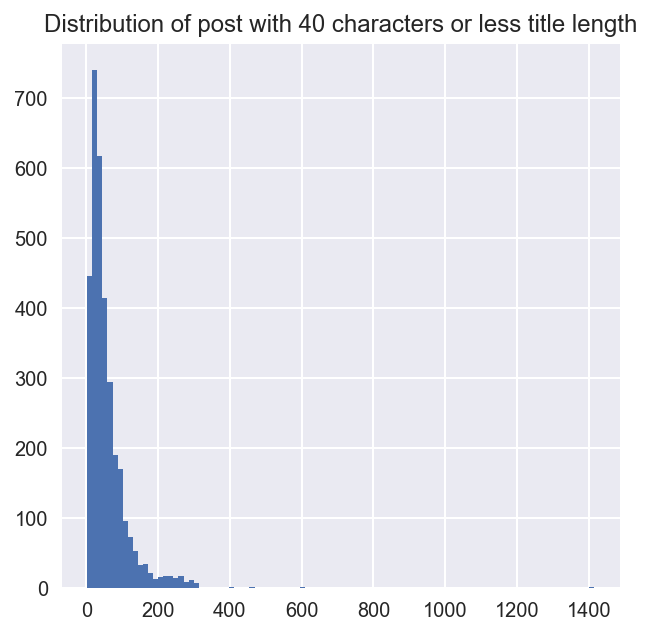

In [32]:
sns.set()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
_ = plt.hist(x=df['length'],bins=100)
_ = plt.title('Distribution of post with 40 characters or less title length')

C:\Users\kiraz\AppData\Local\conda\conda\envs\dsi\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


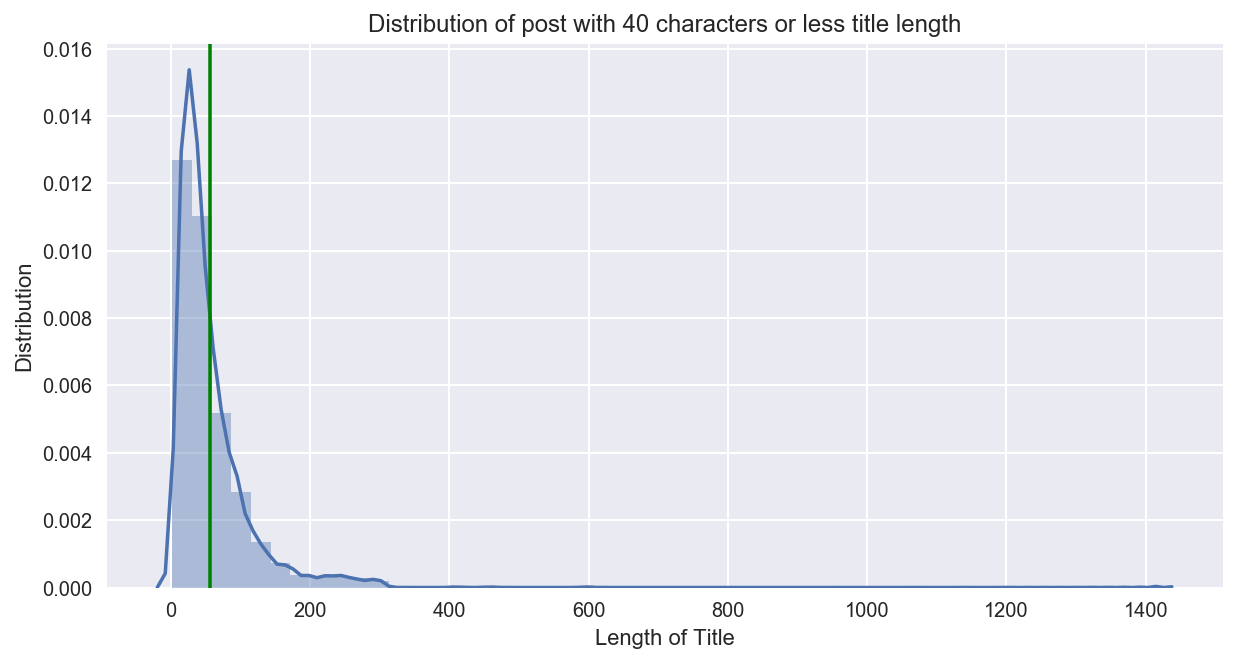

In [33]:
fig = plt.figure(figsize=(10,5))
ax=sns.distplot(df['length'])
plt.axvline(x=df['length'].mean(), color='g')
ax.set(ylabel='Distribution', xlabel='Length of Title', title='Distribution of post with 40 characters or less title length');

In [34]:
# creating feature for length of title (text feature)
df['title'] = df['title'].astype(str)
df['length'] = df['title'].apply(lambda x: len(x))
df['length'].describe()

count    3300.000000
mean       56.940303
std        57.372707
min         2.000000
25%        24.000000
50%        40.000000
75%        70.000000
max      1416.000000
Name: length, dtype: float64

#####  2.5  Predicting  the Target Variable

###### 2.5.1.Creating a Target Variable

In [35]:
## YOUR CODE HERE

In [36]:
# Creating the target variable 
df['HIGH_LOW']=(df['num_comments']>df['num_comments'].median()).astype(int)
print(df.shape)
df.head()

(3300, 25)


,author,created,created_utc,domain,fetched time,gilded,id,name,num_comments,score,...,subreddit_type,thumbnail_height,thumbnail_width,title,ups,url,visited,which_sub,length,HIGH_LOW
2,JMyers666,1527758232,1527729432,v.redd.it,2018-05-31 15:35:57.507532+00:00,0,8ndytk,t3_8ndytk,1288,36191,...,public,78.0,140.0,A diver in Belize has made friends with an oc...,36191.0,https://v.redd.it/hpebu4tce3111,False,others,110,1
3,Endless_Vanity,1527712883,1527684083,i.imgur.com,2018-05-31 10:27:31.504151+00:00,0,8n88yu,t3_8n88yu,170,31998,...,public,140.0,140.0,A plum tree in Japan.,31998.0,https://i.imgur.com/AqKOm52.jpg,False,cat,22,1
4,WitnessMeIRL,1527904422,1527875622,v.redd.it,2018-06-01 20:49:52.948499+00:00,0,8ntyvl,t3_8ntyvl,69,1691,...,public,74.0,140.0,A relaxing stroll along the river,1691.0,https://v.redd.it/g2w0ug0ygf111,False,others,34,1
58,I_am_Brooks_Orpik,1527711682,1527682882,self.caps,2018-06-01 00:14:03.297542+00:00,0,8n84d6,t3_8n84d6,47,504,...,public,133.0,140.0,GRIT SCF G2 EDITION,504.0,https://www.reddit.com/r/caps/comments/8n84d6/...,False,others,20,1
3048,Fleece_It_Out_,1527782695,1527753895,imgur.com,2018-05-31 10:57:07.800747+00:00,0,8ngnlr,t3_8ngnlr,71,49,...,public,140.0,140.0,Just a little curious since no one's interest...,49.0,http://imgur.com/a/2CgPOUJ,False,others,53,1


In [37]:
# create binary variable for +/- median number of comments
print('Median: {}'.format(np.median(df['num_comments'])))
print('75th: {}'.format(np.percentile(df['num_comments'],88)))
print('\n')

df['HIGH_LOW'] = df['num_comments'].apply(lambda x: 1 if x > np.percentile(df['num_comments'],88) else 0)

#verify
print(df['HIGH_LOW'].describe())
df[['HIGH_LOW','num_comments']].head(25)

Median: 38.0
75th: 264.1199999999999


count    3300.000000
mean        0.120000
std         0.325011
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: HIGH_LOW, dtype: float64


,HIGH_LOW,num_comments
2,1,1288
3,0,170
4,0,69
58,0,47
3048,0,71
5,0,167
6,0,12
7,0,12
57,0,88
8,0,73


In [38]:
np.corrcoef(df['num_comments'],df['score'])  # i tried to see if there is 
# association between number of comments and score and it was linear and 
# i droped it from applying for further analysis or as feature.


array([[ 1.        ,  0.49201156],
       [ 0.49201156,  1.        ]])

In [39]:
#df.to_csv('Pro3ExpFinal0602.csv')